# **Imports and Libraries**

In [3]:
! pip install librosa
! pip install mir_eval
!pip install numba==0.48

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 15.4 MB/s 
     |████████████████████████████████| 3.5 MB 64.3 MB/s 
     |████████████████████████████████| 3.5 MB 65.7 MB/s 
     |████████████████████████████████| 3.5 MB 12.0 MB/s 
     |████████████████████████████████| 3.4 MB 66.0 MB/s 
     |████████████████████████████████| 3.4 MB 48.7 MB/s 
     |████████████████████████████████| 3.4 MB 55.7 MB/s 
     |████████████████████████████████| 3.3 MB 12.9 MB/s 
     |████████████████████████████████| 3.5 MB 53.1 MB/s 
     |████████████████████████████████| 3.4 MB 68.3 MB/s 
     |████████████████████████████████| 3.4 MB 59.3 MB/s 
INFO: pip is looking at multiple versions of resampy to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 3.1 MB 53.7 MB/s 
     |████████████████████████████████| 3.1 MB 20.3 MB/s 
   

In [4]:
import matplotlib.pyplot as plt
import librosa
import librosa.display as dsp
import mir_eval
import numpy as np
import IPython.display as ipd

# **Displaying a spectrogram/chromagram/cqt/etc.**

In [6]:
audio_data = "/content/021.wav"
y , sr = librosa.load(audio_data)
ipd.Audio(audio_data)


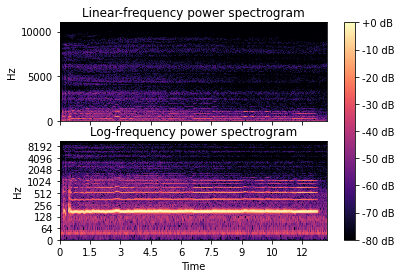

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

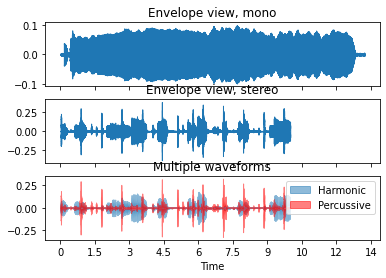

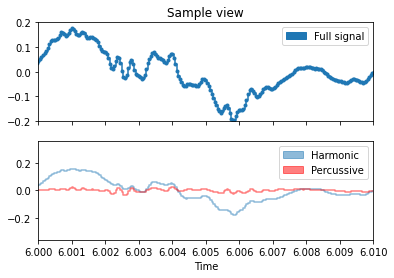

In [8]:
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

y, sr = librosa.load(librosa.ex('choice', hq=True), mono=False, duration=10)
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')
ax[1].label_outer()
y, sr = librosa.load(librosa.ex('choice'), duration=10)
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()

fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True)
ax.set(xlim=[6.0, 6.01], title='Sample view', ylim=[-0.2, 0.2])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()

# **Computing a mel-scaled spectrogram**

In [9]:
audio_data = "/content/021.wav"
y , sr = librosa.load(audio_data)
librosa.feature.melspectrogram(y=y, sr=sr)

array([[1.54544413e-03, 9.05426499e-03, 1.49472188e-02, ...,
        1.84689760e-02, 3.53156589e-02, 4.33846712e-02],
       [4.76797344e-03, 1.23275537e-02, 2.95840017e-02, ...,
        2.39427760e-02, 6.27008453e-02, 1.12087235e-01],
       [3.17473104e-03, 2.22510681e-03, 3.37904692e-03, ...,
        7.28363823e-03, 7.15300860e-03, 2.04299875e-02],
       ...,
       [5.54671331e-08, 5.56022144e-08, 4.58314453e-08, ...,
        1.98898604e-07, 1.55383873e-07, 1.49480442e-07],
       [7.36884154e-09, 6.14378548e-09, 6.23237906e-09, ...,
        8.53572235e-09, 7.62231878e-09, 1.49375126e-08],
       [3.72166542e-09, 9.77696590e-10, 9.50252238e-11, ...,
        1.02166123e-10, 1.36622713e-10, 5.75237524e-10]], dtype=float32)

In [10]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

In [11]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

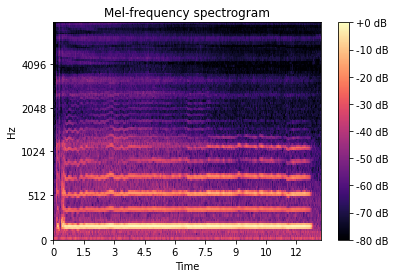

In [12]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

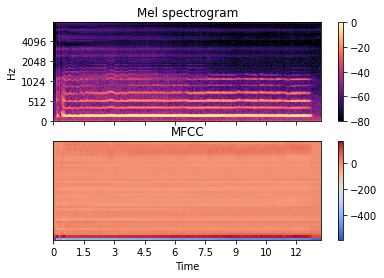

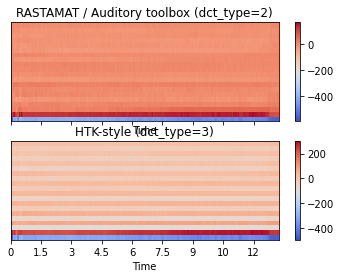

In [13]:
librosa.feature.mfcc(y=y, sr=sr)
librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
librosa.feature.mfcc(S=librosa.power_to_db(S))
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),x_axis='time', y_axis='mel', fmax=8000,ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img1 = librosa.display.specshow(m_slaney, x_axis='time', ax=ax[0])
ax[0].set(title='RASTAMAT / Auditory toolbox (dct_type=2)')
fig.colorbar(img, ax=[ax[0]])
img2 = librosa.display.specshow(m_htk, x_axis='time', ax=ax[1])
ax[1].set(title='HTK-style (dct_type=3)')
fig.colorbar(img2, ax=[ax[1]])

# **Short-time Fourier transform (STFT)**

In [14]:
audio_data = "/content/021.wav"
y , sr = librosa.load(audio_data)
S = np.abs(librosa.stft(y))
S

array([[4.25321758e-02, 2.74603795e-02, 9.42568481e-03, ...,
        2.74081193e-02, 9.84041858e-03, 2.39571646e-01],
       [1.21202327e-01, 8.95134807e-02, 9.31302011e-02, ...,
        1.81809738e-02, 6.70973882e-02, 2.99117833e-01],
       [4.81248042e-03, 1.94595084e-01, 5.96899167e-02, ...,
        5.57690077e-02, 8.77084807e-02, 3.46722007e-01],
       ...,
       [1.98117399e-04, 9.90614208e-05, 1.83735036e-08, ...,
        1.24183295e-08, 3.66958852e-06, 2.36382457e-05],
       [1.98116220e-04, 9.90563858e-05, 2.75320655e-09, ...,
        1.22428174e-08, 3.64916059e-06, 2.35510161e-05],
       [1.98109134e-04, 9.90511471e-05, 1.36237399e-09, ...,
        4.78255346e-09, 3.67264738e-06, 2.35226235e-05]], dtype=float32)

In [15]:
S_left = librosa.stft(y, center=False)
D_short = librosa.stft(y, hop_length=64)


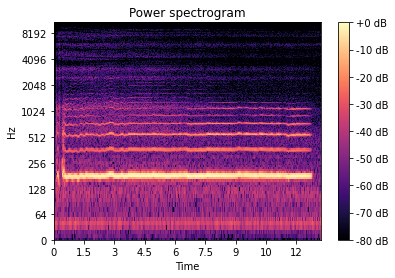

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [17]:
D = librosa.stft(y)
y_hat = librosa.istft(D)
y_hat

array([-8.6197615e-05, -3.1180456e-04, -5.8684225e-05, ...,
       -1.3587308e-03, -1.0409587e-03, -1.2096522e-03], dtype=float32)

In [18]:
n = len(y)
n_fft = 2048
y_pad = librosa.util.fix_length(y, size=n + n_fft // 2)
D = librosa.stft(y_pad, n_fft=n_fft)
y_out = librosa.istft(D, length=n)
np.max(np.abs(y - y_out))

1.4901161e-08

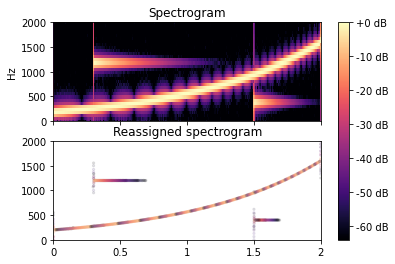

In [19]:
amin = 1e-10
n_fft = 64
sr = 4000
y = 1e-3 * librosa.clicks(times=[0.3], sr=sr, click_duration=1.0,click_freq=1200.0, length=8000) +\
    1e-3 * librosa.clicks(times=[1.5], sr=sr, click_duration=0.5,click_freq=400.0, length=8000) +\
    1e-3 * librosa.chirp(fmin=200, fmax=1600, sr=sr, duration=2.0) +\
    1e-6 * np.random.randn(2*sr)
freqs, times, mags = librosa.reassigned_spectrogram(y=y, sr=sr,n_fft=n_fft)
mags_db = librosa.amplitude_to_db(mags, ref=np.max)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img = librosa.display.specshow(mags_db, x_axis="s", y_axis="linear", sr=sr,hop_length=n_fft//4, ax=ax[0])
ax[0].set(title="Spectrogram", xlabel=None)
ax[0].label_outer()
ax[1].scatter(times, freqs, c=mags_db, cmap="magma", alpha=0.1, s=5)
ax[1].set_title("Reassigned spectrogram")
fig.colorbar(img, ax=ax, format="%+2.f dB")

# **Beat tracker**

In [20]:
audio_data = "/content/021.wav"
y , sr = librosa.load(audio_data)

In [21]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
tempo

172.265625

In [22]:
beats

array([ 9, 21])

In [23]:
librosa.frames_to_time(beats, sr=sr)

array([0.20897959, 0.48761905])

In [24]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,
                                       sr=sr)
tempo




172.265625

In [25]:
beats

array([ 9, 21])

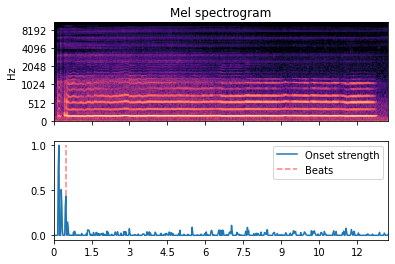

In [26]:
hop_length = 512
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[1].legend()

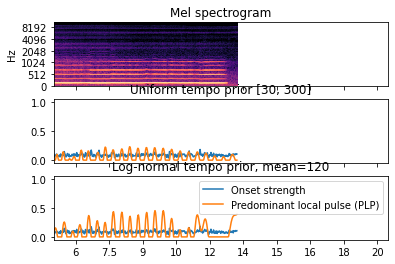

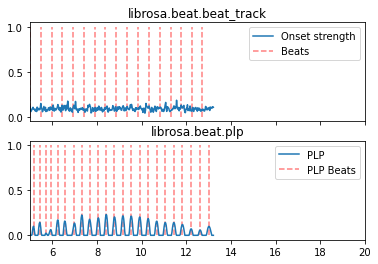

In [27]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)
# Or compute pulse with an alternate prior, like log-normal
import scipy.stats
prior = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
pulse_lognorm = librosa.beat.plp(onset_envelope=onset_env, sr=sr,
                                 prior=prior)
melspec = librosa.feature.melspectrogram(y=y, sr=sr)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.specshow(librosa.power_to_db(melspec,
                                             ref=np.max),
                         x_axis='time', y_axis='mel', ax=ax[0])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
ax[1].plot(librosa.times_like(onset_env),
         librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].plot(librosa.times_like(pulse),
         librosa.util.normalize(pulse),
         label='Predominant local pulse (PLP)')
ax[1].set(title='Uniform tempo prior [30, 300]')
ax[1].label_outer()
ax[2].plot(librosa.times_like(onset_env),
         librosa.util.normalize(onset_env),
         label='Onset strength')
ax[2].plot(librosa.times_like(pulse_lognorm),
         librosa.util.normalize(pulse_lognorm),
         label='Predominant local pulse (PLP)')
ax[2].set(title='Log-normal tempo prior, mean=120', xlim=[5, 20])
ax[2].legend()

tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
times = librosa.times_like(onset_env, sr=sr)
ax[0].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[0].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[0].legend()
ax[0].set(title='librosa.beat.beat_track')
ax[0].label_outer()
# Limit the plot to a 15-second window
times = librosa.times_like(pulse, sr=sr)
ax[1].plot(times, librosa.util.normalize(pulse),
         label='PLP')
ax[1].vlines(times[beats_plp], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='PLP Beats')
ax[1].legend()
ax[1].set(title='librosa.beat.plp', xlim=[5, 20])
ax[1].xaxis.set_major_formatter(librosa.display.TimeFormatter())

# **Compute the constant-Q transform of an audio signal**

In [28]:
audio_data = "/content/021.wav"
y , sr = librosa.load(audio_data)

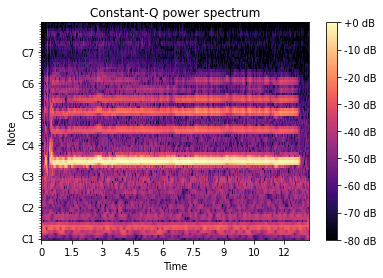

In [29]:
C = np.abs(librosa.cqt(y=y, sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [30]:
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'),
                n_bins=60))
C

array([[5.9306659e-03, 6.1007054e-03, 6.2874611e-03, ..., 4.1496018e-03,
        1.9665770e-03, 1.9534617e-03],
       [1.8544493e-03, 4.3846769e-03, 7.5070485e-03, ..., 1.4416768e-02,
        1.3859941e-02, 1.2929359e-02],
       [3.2868134e-03, 4.3588518e-03, 7.0196330e-03, ..., 2.0729342e-02,
        2.3595333e-02, 2.5418140e-02],
       ...,
       [1.1595539e-04, 2.9778242e-04, 3.1000085e-04, ..., 1.4215386e-04,
        1.6917512e-04, 1.2494934e-04],
       [1.3530703e-04, 2.0931561e-04, 2.8031311e-04, ..., 1.9847644e-04,
        2.9087887e-04, 2.1984923e-04],
       [1.4102172e-04, 1.9854418e-04, 2.3730582e-04, ..., 9.1075031e-05,
        2.4390736e-04, 5.7451212e-05]], dtype=float32)

In [31]:
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'),
                n_bins=60 * 2, bins_per_octave=12 * 2))
C

array([[4.1612945e-03, 4.0919799e-03, 3.8515099e-03, ..., 5.8146087e-03,
        4.8515280e-03, 4.1793929e-03],
       [8.7366346e-03, 8.6471755e-03, 8.4543368e-03, ..., 3.9462592e-03,
        4.1366676e-03, 4.3554297e-03],
       [1.2749992e-03, 3.7760697e-03, 6.8660900e-03, ..., 7.0476071e-03,
        6.9221244e-03, 6.8308967e-03],
       ...,
       [3.8015743e-05, 1.8144706e-04, 2.5112092e-04, ..., 3.2118941e-04,
        1.3355128e-04, 1.2052624e-04],
       [4.3480632e-05, 1.5654959e-04, 2.9976445e-04, ..., 1.2500235e-04,
        2.2553637e-04, 9.8586956e-05],
       [1.5043699e-04, 1.5872040e-04, 1.9254866e-04, ..., 1.8265439e-04,
        4.2183927e-04, 2.5692358e-05]], dtype=float32)

In [32]:
y, sr = librosa.load(librosa.ex('trumpet'))
C = librosa.cqt(y=y, sr=sr)
y_hat = librosa.icqt(C=C, sr=sr)
hop_length = 256
bins_per_octave = 12 * 3
C = librosa.cqt(y=y, sr=sr, hop_length=256, n_bins=7*bins_per_octave,
                bins_per_octave=bins_per_octave)
y_hat = librosa.icqt(C=C, sr=sr, hop_length=hop_length,
                bins_per_octave=bins_per_octave)

/usr/local/lib/python3.8/dist-packages/librosa/core/constantq.py:670: UserWarning: hop_length=512 exceeds minimum CQT filter length=93.853.
This will probably cause unpleasant acoustic artifacts. Consider decreasing your hop length or increasing the frequency resolution of your CQT.
  warnings.warn(


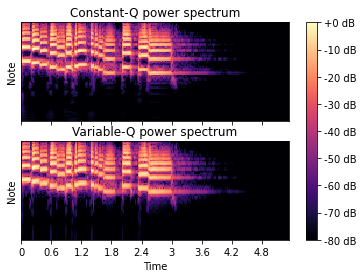

In [33]:
C = np.abs(librosa.cqt(y, sr=sr))
V = np.abs(librosa.vqt(y, sr=sr))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                         sr=sr, x_axis='time', y_axis='cqt_note', ax=ax[0])
ax[0].set(title='Constant-Q power spectrum', xlabel=None)
ax[0].label_outer()
img = librosa.display.specshow(librosa.amplitude_to_db(V, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax[1])
ax[1].set_title('Variable-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")